# Python과 OpenCV를 사용한 Template Matching 실습
## Exercise 1.
### OpenCV 불러오기

In [1]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
# !git clone https://github.com/hoihoic/OpenCV_face_detection_exercise.git
# !mv OpenCV_face_detection_exercise/* ./

import cv2 # opencv
import numpy as np # treat image as matrix
from matplotlib import pyplot as plt # plot result

Cloning into 'OpenCV_face_detection_exercise'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 50 (delta 26), reused 36 (delta 15), pack-reused 0
Unpacking objects: 100% (50/50), done.


### 이미지 불러오기

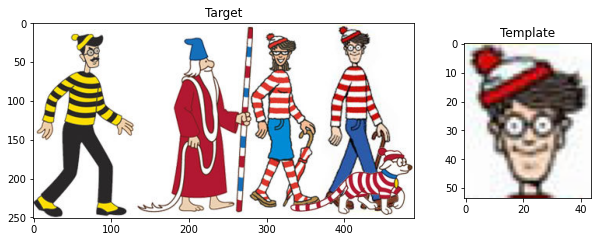

In [2]:
target = cv2.imread('where_is_wally.png') # load target image
template = cv2.imread('wally.png') # load template

# Convert BGR to RGB
target_plt = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
template_plt = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# show image and template
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10,10))
axs[0].imshow(target_plt)
axs[0].title.set_text('Target')
axs[1].imshow(template_plt)
axs[1].title.set_text('Template')

### Template Matching 하기
- cv2.matchTemplate()와 cv2.minMaxLoc()을 사용하여 이미지에서 template의 위치를 찾아보세요.<br>
- matchTemplate()의 compare방법에 따라서 최대값, 최소값 중에 적합한 값을 선택해보세요.

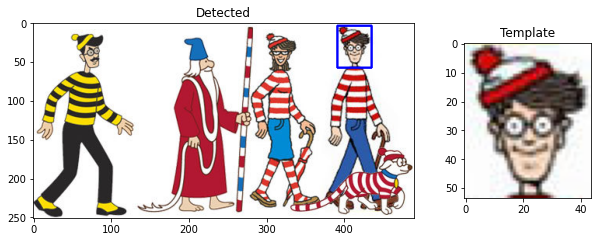

In [3]:
# Convert BGR to Gray
target_bw = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY) # problem (1)
template_bw = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) # problem (2)

# Run template matching
res = cv2.matchTemplate(target_bw, template_bw, cv2.TM_SQDIFF_NORMED) # problem (3)

# Find matched location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) #problem (4)

# Draw rectange at the detected
w, h, _ = template.shape
top_left = min_loc
bottom_right = (top_left[0] + h, top_left[1] + w)
target_match1 = target_plt.copy()
cv2.rectangle(target_match1, top_left, bottom_right, (0,0,255), 2)

# show image and template
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10,10))
axs[0].imshow(target_match1)
axs[0].title.set_text('Detected')
axs[1].imshow(template_plt)
axs[1].title.set_text('Template')

### 이미지에서 월리가 고개를 돌리면?

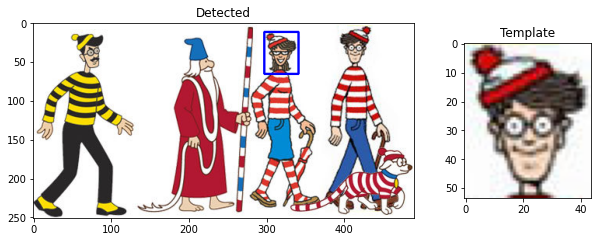

In [9]:
target_flip = cv2.imread('where_is_wally_flipped.png')
target_flip_bw = cv2.cvtColor(target_flip, cv2.COLOR_BGR2GRAY)
target_flip_plt = cv2.cvtColor(target_flip, cv2.COLOR_BGR2RGB)

res = cv2.matchTemplate(target_flip_bw, template_bw, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Draw rectange at the detected
w, h, _ = template.shape
top_left = min_loc
bottom_right = (top_left[0] + h, top_left[1] + w)
target_match2 = target_flip_plt.copy()
cv2.rectangle(target_match2, top_left, bottom_right, (0,0,255), 2)

# show image and template
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10,10))
axs[0].imshow(target_match2)
axs[0].title.set_text('Detected')
axs[1].imshow(template_plt)
axs[1].title.set_text('Template')